In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn import metrics
from sklearn.metrics import silhouette_score as sil_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.metrics import ConfusionMatrixDisplay, classification_report



%matplotlib inline

In [ ]:
def calculate_null_accuracy(y):
    vals, counts = np.unique(y, return_counts=True)
    
    norm = counts / np.sum(counts)
    
    return max(norm)

def print_line(title=None):
    print(80*'-')
    if title:
        print('* ', title, ' *')
        print(80*'-')
    

In [ ]:
wine = pd.read_csv('/content/wine.csv')
'''
group_names = ['class1', 'class2', 'class3']
wine['class'] = pd.cut(wine['class'], bins=bins, labels=group_names)
wine['class'].unique()
label_class = LabelEncoder()
wine['class'] = label_class.fit_transform(wine['class'])
'''
wineX = wine.drop('class', axis=1)
wineY = wine['class']
wineX_scaled = scale(wineX)
labels = ['1', '2', '3']


In [ ]:
car = pd.read_csv('/content/car.csv')
carX = car.drop('value', axis=1)
carY = car['value']
carX_scaled = scale(carX)

In [ ]:


# kmeans plot showing elbow method and silhouette score
def kmeans_plot(dataName, data):
    sse = []
    scores = []
    for i in range(2,15):
        kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        
        kmeans_labels = kmeans.predict(data)
        scores.append(sil_score(data, kmeans_labels))
                
    # Plot the data
    title = "K-means of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(211)
    plt.plot(range(2,15),sse, 'x-')
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.grid()
    
    plt.subplot(212)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()
            
            
# expectation maximization plot showing bic and silhouette score
def em_plot(dataName, data):
    aic = []
    bic = []
    scores = []
    for i in range(2,15):
        gmm = GaussianMixture(n_components=i, random_state=0)
        gmm.fit(data)
        aic.append(gmm.aic(data))
        bic.append(gmm.bic(data))
        
        gmm_labels = gmm.predict(data)
        scores.append(sil_score(data, gmm_labels))
                
    # Plot the data
    title = "Expectation Maximization of " + dataName
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    plt.subplot(311)
    plt.plot(range(2,15), aic, 'x-')
    plt.title("AIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('AIC')
    plt.grid()
    
    plt.subplot(312)
    plt.plot(range(2,15), bic, 'x-')
    plt.title("BIC Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('BIC')
    plt.grid()
    
    plt.subplot(313)
    plt.plot(range(2,15),scores, 'x-')
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.show()

#kmeans_plot('Wine Quality', wineX)
#em_plot('Wine Quality', wineX)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

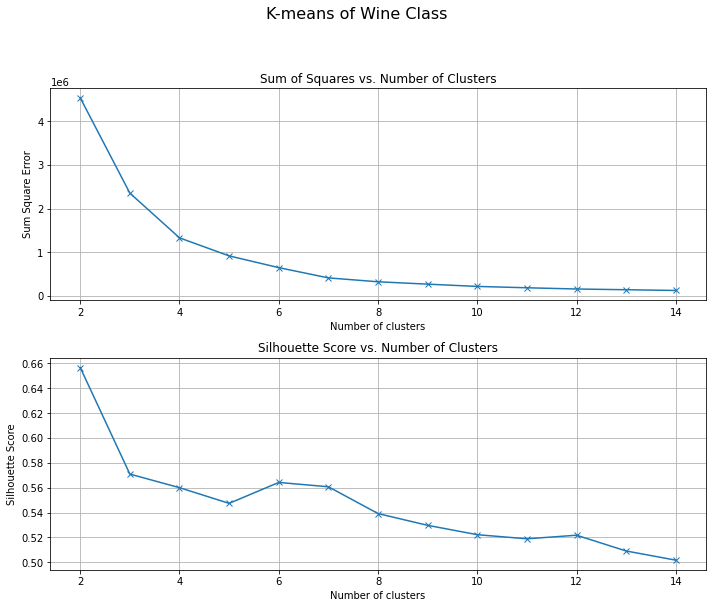

In [ ]:
kmeans_plot('Wine Class', wineX)

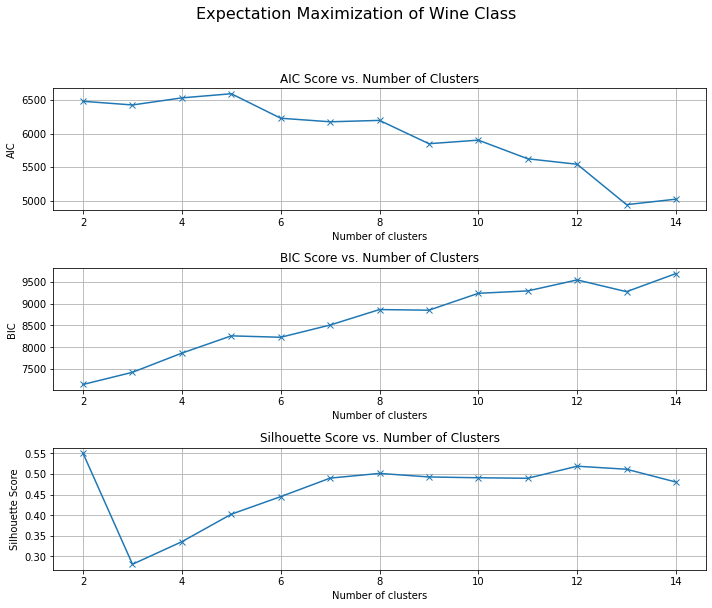

In [ ]:
em_plot('Wine Class', wineX)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

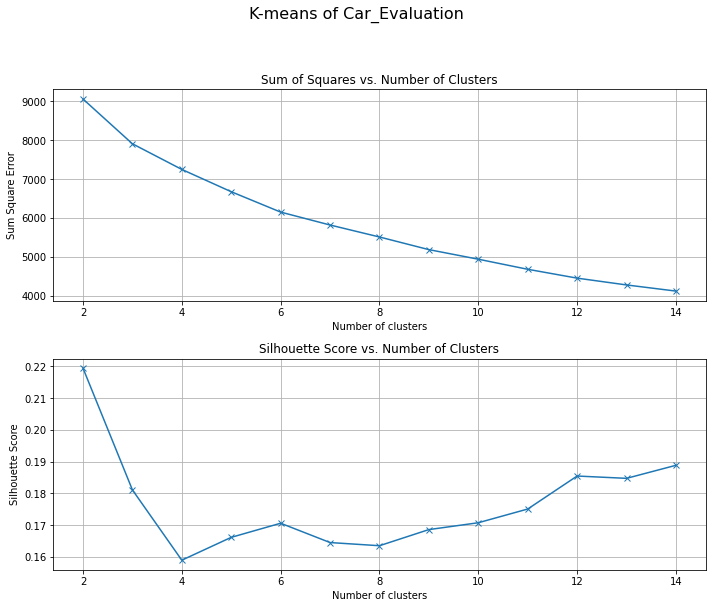

In [ ]:
kmeans_plot('Car_Evaluation', carX)

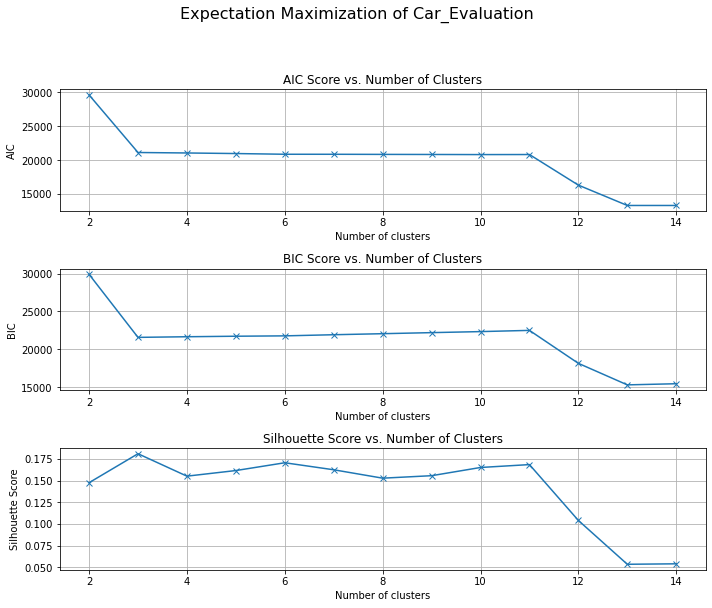

In [ ]:
em_plot('Car_Evaluation', carX)

In [ ]:
# Dimensionality reduction imports
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection as RP
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.linalg import pinv
from scipy.stats import kurtosis
from scipy import sparse 


# borrowed from https://github.com/JonathanTay/CS-7641-assignment-3/
def reconstruction_error(algo, data):
    W = algo.components_
    if sparse.issparse(W):
        W = W.todense()
    p = pinv(W)
    reconstructed = ((p @ W) @ (data.T)).T
    errors = np.square(data - reconstructed)
    return np.nanmean(errors)

#
# PCA
#

def calc_pca_components(data, dataName):
    t0 = time()
    
    pca = PCA(n_components=data.shape[1], random_state=0)
    pca.fit(data)
    var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
    
    end = time() - t0
    
    plt.title('PCA Analysis for %s' % dataName)
    plt.ylabel('Cumulative % Variance')
    plt.xlabel('Number of Features')
    plt.axhline(y=95, color='gray', linestyle='--', label='95% Variance')
    plt.plot(range(1,data.shape[1]+1), var)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    numComponents = np.argmax(var>95) + 1
    
    
    print('%s total features: %d' %(dataName, data.shape[1]))
    print('Best Number of PCA Components: %d' % numComponents)
    print('Total Time: %.3f seconds' % end)
    
    
#
# ICA
#
def calc_ica_components(data, dataName):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    for dim in range(2,dimensions):
        ica = FastICA(n_components=dim, max_iter=600, random_state=0)
        res = ica.fit_transform(data)
        tmp = pd.DataFrame(res)
        k   = tmp.kurt(axis=0)
        kurtosis.append(k.abs().mean())
        
    end = time() - t0
    
    optimalComponents = np.argmax(kurtosis)
    
    plt.title('ICA Analysis for %s' % dataName)
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of ICA Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# RP
#
def calc_rp_components(data, dataName, tries=100):
    t0 = time()
    
    dimensions = data.shape[1]+1
    kurtosis = []
    stddev_kurtosis = []
    lowerbound = []
    upperbound = []
    for dim in range(2,dimensions):
        kurts = []
        for t in range(tries):
            rp = RP(n_components=dim)
            res = rp.fit_transform(data)
            tmp = pd.DataFrame(res)
            k   = tmp.kurt(axis=0)
            kurts.append(k.abs().mean())
        kurtosis.append(np.mean(kurts))
        lowerbound.append(np.mean(kurts)-np.std(kurts))
        upperbound.append(np.mean(kurts)+np.std(kurts))
        
    optimalComponents = np.argmax(kurtosis)
    
    end = time() - t0
    
    plt.title('RP Analysis for %s: %d Iterations' % (dataName, tries))
    plt.ylabel('Kurtosis')
    plt.xlabel('Number of Features')
    plt.plot(range(2,dimensions), kurtosis)
    plt.fill_between(range(2, dimensions), lowerbound, upperbound, facecolor='gray', alpha=0.1)
    plt.grid()
    plt.show()
    
    print('Total Number of Features:', data.shape[1])
    print('Best Number of RP Components:', optimalComponents+2)
    print('Total Time: %.3f seconds' % end)
    
    return optimalComponents
    
#
# UFS
#
# function based on https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
def calc_kbest(dataX, datay, dataName):
    t0 = time()
    
    kBest = SelectKBest(f_classif, k=4)
    kBest.fit(dataX, datay)
    scores = kBest.pvalues_
    scores[np.isnan(scores)]=0 # get rid of NaN's
    scores += 1e-308           # get rid of zero values
    scores = -np.log10(scores)
    scores /= scores.max()
    
    plt.title('UFS Analysis for %s' % dataName)
    plt.ylabel('Normalized Univariate Score')
    plt.xlabel('Feature Number')
    plt.bar(np.arange(dataX.shape[-1]),scores)
    plt.grid(alpha=0.3)
    plt.show()

    end = time() - t0
    print('Total Time: %.3f seconds' % end)




--------------------------------------------------------------------------------
*  Wine PCA  *
--------------------------------------------------------------------------------


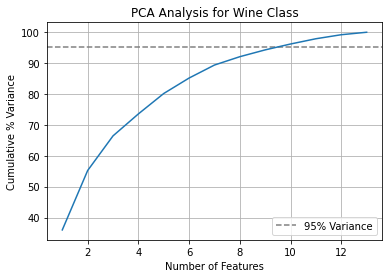

Wine Class total features: 13
Best Number of PCA Components: 10
Total Time: 0.024 seconds
PCA Reconstruction Error:  6.805831401956093e-31
--------------------------------------------------------------------------------
*  Wine ICA  *
--------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='u

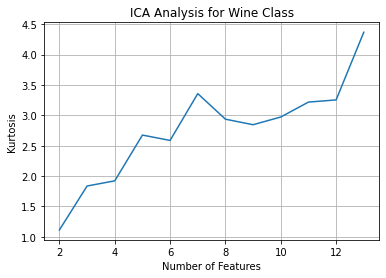

Total Number of Features: 13
Best Number of ICA Components: 13
Total Time: 2.500 seconds
ICA Reconstruction Error:  0.020948195679881505
--------------------------------------------------------------------------------
*  Wine RP  *
--------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


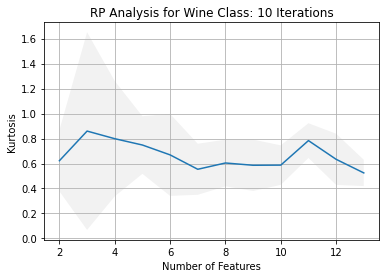

Total Number of Features: 13
Best Number of RP Components: 3
Total Time: 0.202 seconds


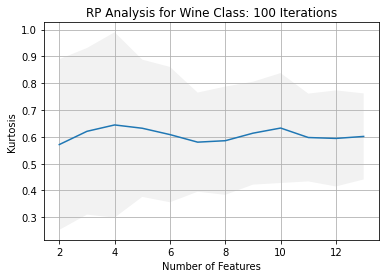

Total Number of Features: 13
Best Number of RP Components: 4
Total Time: 1.535 seconds
ICA Reconstruction Error:  0.8620684723556361
--------------------------------------------------------------------------------
*  Wine UFS  *
--------------------------------------------------------------------------------


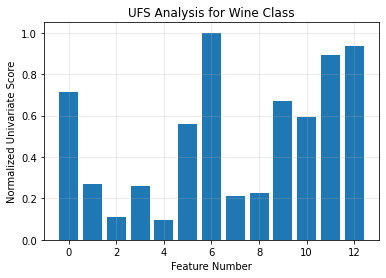

Total Time: 0.301 seconds


In [ ]:
#
# PCA
#
print_line('Wine PCA')
wine_pca_components = calc_pca_components(wineX_scaled, 'Wine Class')
winePCA = PCA(n_components=wine_pca_components, random_state=0).fit(wineX_scaled)
wine_pca_sse = reconstruction_error(winePCA, wineX_scaled)
print('PCA Reconstruction Error: ', wine_pca_sse)



#
# ICA
#
print_line('Wine ICA')
wine_ica_components = calc_ica_components(wineX_scaled, 'Wine Class')
wineICA = FastICA(n_components=wine_ica_components, random_state=0).fit(wineX_scaled)
wine_ica_sse = reconstruction_error(wineICA, wineX_scaled)
print('ICA Reconstruction Error: ', wine_ica_sse)


#
# RP
#
print_line('Wine RP')
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Class', 10)
wine_rp_components = calc_rp_components(wineX_scaled, 'Wine Class', 100)
wineRP = RP(n_components=wine_rp_components, random_state=0).fit(wineX_scaled)
wine_rp_sse = reconstruction_error(wineRP, wineX_scaled)
print('ICA Reconstruction Error: ', wine_rp_sse)


#
# UFS
#
print_line('Wine UFS')
calc_kbest(wineX_scaled, wineY, 'Wine Class')

--------------------------------------------------------------------------------
*  Car PCA  *
--------------------------------------------------------------------------------


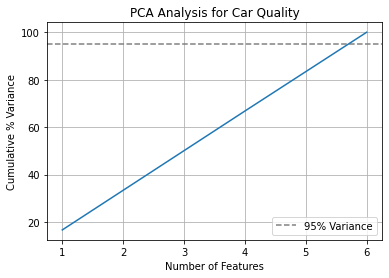

Car Quality total features: 6
Best Number of PCA Components: 6
Total Time: 0.012 seconds
PCA Reconstruction Error:  3.0758020272779956e-31
--------------------------------------------------------------------------------
*  Car ICA  *
--------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


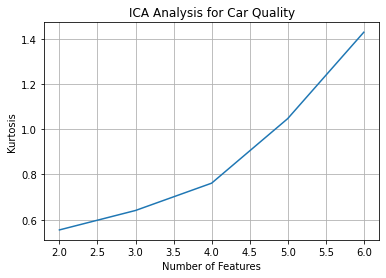

Total Number of Features: 6
Best Number of ICA Components: 6
Total Time: 0.092 seconds
ICA Reconstruction Error:  0.3326033714109637
--------------------------------------------------------------------------------
*  Car RP  *
--------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


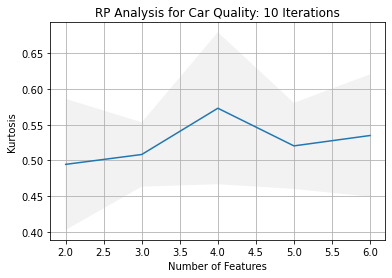

Total Number of Features: 6
Best Number of RP Components: 4
Total Time: 0.135 seconds


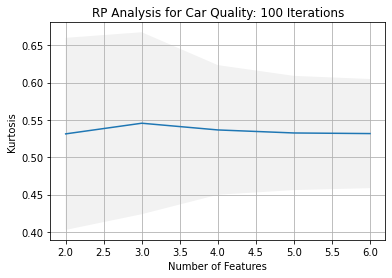

Total Number of Features: 6
Best Number of RP Components: 3
Total Time: 1.381 seconds
ICA Reconstruction Error:  0.8331755329330736
--------------------------------------------------------------------------------
*  Car UFS  *
--------------------------------------------------------------------------------


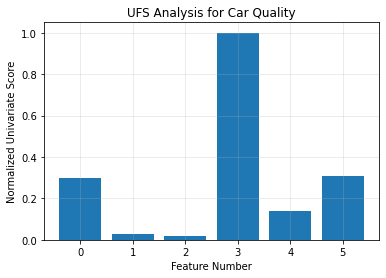

Total Time: 0.799 seconds


In [ ]:
#
# PCA
#
print_line('Car PCA')
Car_pca_components = calc_pca_components(carX_scaled, 'Car Quality')
CarPCA = PCA(n_components=Car_pca_components, random_state=0).fit(carX_scaled)
Car_pca_sse = reconstruction_error(CarPCA, carX_scaled)
print('PCA Reconstruction Error: ', Car_pca_sse)



#
# ICA
#
print_line('Car ICA')
Car_ica_components = calc_ica_components(carX_scaled, 'Car Quality')
CarICA = FastICA(n_components=Car_ica_components, random_state=0).fit(carX_scaled)
Car_ica_sse = reconstruction_error(CarICA, carX_scaled)
print('ICA Reconstruction Error: ', Car_ica_sse)


#
# RP
#
print_line('Car RP')
Car_rp_components = calc_rp_components(carX_scaled, 'Car Quality', 10)
Car_rp_components = calc_rp_components(carX_scaled, 'Car Quality', 100)
CarRP = RP(n_components=Car_rp_components, random_state=0).fit(carX_scaled)
Car_rp_sse = reconstruction_error(CarRP, carX_scaled)
print('ICA Reconstruction Error: ', Car_rp_sse)


#
# UFS
#
print_line('Car UFS')
calc_kbest(carX_scaled, carY, 'Car Quality')

In [ ]:
# Run all kmeans and plot results
def compare_kmeans(dataName, datasets):
    # Loop through all datasets
    all_sse = []
    all_scores = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        sse    = []
        scores = []
        
        # try different cluster sizes
        for i in range(2,15):
            kmeans = KMeans(n_clusters=i,init='k-means++', random_state=0)
            kmeans.fit(data)
            sse.append(kmeans.inertia_)
            
            kmeans_labels = kmeans.predict(data)
            scores.append(sil_score(data, kmeans_labels))
            
        all_sse.append(sse)
        all_scores.append(scores)
        all_methods.append(d[0])
                    
    # Plot the data
    title = "K-means of " + dataName + " Using Dimensionality Reduction"
    plt.figure(figsize=(10, 8))
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(211)
    for i,sse in enumerate(all_sse):
        plt.plot(range(2,15), sse, lines[i], label=all_methods[i])
    plt.title("Sum of Squares vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum Square Error')
    plt.legend()
    plt.grid()
    
    plt.subplot(212)
    for i, score in enumerate(all_scores):
        plt.plot(range(2,15), score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()
    
def compare_em(dataName, datasets):
    # Loop through all datasets
    all_aic     = []
    all_bic     = []
    all_scores  = []
    all_dims    = []
    all_methods = []
    for d in datasets:
        data   = d[1]
        dimensions = data.shape[1] + 1
        all_dims.append(list(range(2,dimensions)))
        
        aic    = []
        bic    = []
        scores = []
        
        for i in range(2,dimensions):
            gmm = GaussianMixture(n_components=i, random_state=0)
            gmm.fit(data)
            aic.append(gmm.aic(data))
            bic.append(gmm.bic(data))
        
            gmm_labels = gmm.predict(data)
            scores.append(sil_score(data, gmm_labels))
        
        all_aic.append(aic)
        all_bic.append(bic)
        all_scores.append(scores)
        all_methods.append(d[0])
    
    # Plot the data
    title = "EM of " + dataName + " Using Dimensionality Reduction"
    fig = plt.figure(figsize=(10, 8))
    
    plt.suptitle(title, y=1.05, fontsize=16)
    
    # create method to change line types
    lines = ["o-", "x-", "x--", "x-.", "x:"]
    
    plt.subplot(311)
    for i,aic in enumerate(all_aic):
        plt.plot(all_dims[i], aic, lines[i], label=all_methods[i])
    plt.title("AIC vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplot(312)
    for i,bic in enumerate(all_bic):
        plt.plot(all_dims[i], bic, lines[i], label=all_methods[i])
    plt.title("BIC Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    plt.subplot(313)
    for i,score in enumerate(all_scores):
        plt.plot(all_dims[i], score, lines[i], label=all_methods[i])
    plt.title("Silhouette Score vs. Number of Components")
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    


# code based on example found at:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
def bench_kmeans(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_, metric='euclidean')))
   
def bench_em(estimator, labels, name, data):
    t0 = time()
    estimator.fit(data)
    gmm_labels = estimator.predict(data)
    print('%-9s\t%.2fs\t%i\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.aic(data), estimator.bic(data),
             metrics.homogeneity_score(labels, gmm_labels),
             metrics.completeness_score(labels, gmm_labels),
             metrics.v_measure_score(labels, gmm_labels),
             metrics.adjusted_rand_score(labels, gmm_labels),
             metrics.adjusted_mutual_info_score(labels,  gmm_labels),
             metrics.silhouette_score(data, gmm_labels, metric='euclidean')))


In [ ]:
# reduce wine data set
winePCA = PCA(n_components=9, random_state=0).fit_transform(wineX_scaled)
wineICA = FastICA(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineRP  = RP(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineUFS = SelectKBest(f_classif, k=4).fit_transform(wineX_scaled, wineY)

wine_data = []
wine_data.append(['Original', wineX_scaled])
wine_data.append(['PCA', winePCA])
wine_data.append(['ICA', wineICA])
wine_data.append(['RP',  wineRP])
wine_data.append(['UFS', wineUFS])

# reduce car dataset

# delete columns with no unique information
carPCA = PCA(n_components=6, random_state=0).fit_transform(carX_scaled)
carICA = FastICA(n_components=6, random_state=0).fit_transform(carX_scaled)
carRP  = RP(n_components=6, random_state=0).fit_transform(carX_scaled)

# delete columns with no unique information
trimmed_carX_scaled = carX_scaled[:, ~np.all(carX_scaled[1:] == carX_scaled[:-1], axis=0)]
carUFS = SelectKBest(f_classif, k='all').fit_transform(trimmed_carX_scaled, carY)

car_data = []
car_data.append(['Original', carX_scaled])
car_data.append(['PCA', carPCA])
car_data.append(['ICA', carICA])
car_data.append(['RP',  carRP])
car_data.append(['UFS', carUFS])

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

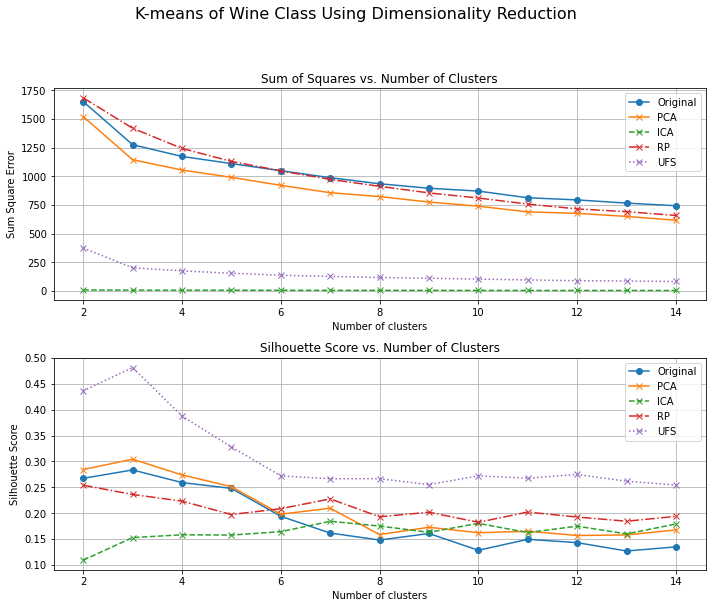

--------------------------------------------------------------------------------
*  K-Means Wine Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.02s	1651	0.402	0.664	0.501	0.388	0.498	0.267
PCA-based	0.01s	1519	0.402	0.664	0.501	0.388	0.498	0.284
ICA-based	0.02s	7	0.478	0.856	0.613	0.470	0.611	0.124
RP-based 	0.01s	1683	0.240	0.379	0.294	0.317	0.289	0.254
UFS-based	0.02s	373	0.505	0.843	0.632	0.526	0.630	0.437


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
# Create k-means plots
compare_kmeans('Wine Class', wine_data)

# Create k-means benchmark table
print_line('K-Means Wine Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=wineY, name="Original",  data=wineX_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=wineY, name="PCA-based", data=winePCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=wineY, name="ICA-based", data=wineICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=wineY, name="RP-based",  data=wineRP)
bench_kmeans(KMeans(init='k-means++', n_clusters=2), labels=wineY, name="UFS-based", data=wineUFS)

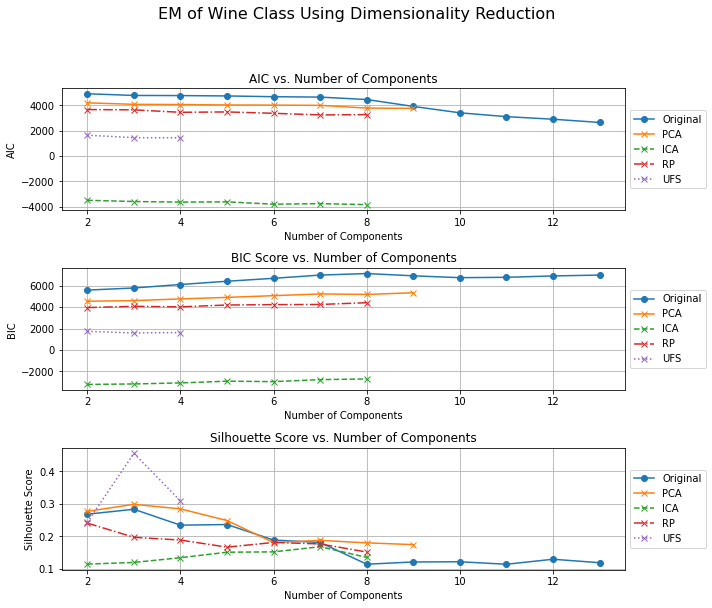

--------------------------------------------------------------------------------
*  EM Wine Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	0.08s	4464	7129	0.841	0.459	0.594	0.395	0.582	0.114
PCA-based	0.05s	3788	5182	0.869	0.501	0.635	0.522	0.624	0.180
ICA-based	0.08s	-3842	-2702	0.804	0.449	0.576	0.442	0.564	0.135
RP-based 	0.06s	3269	4410	0.749	0.428	0.545	0.481	0.532	0.151
UFS-based	0.04s	1474	1852	0.853	0.448	0.587	0.364	0.576	0.230


In [ ]:
# Create k-means plots
compare_em('Wine Class', wine_data)

# Create k-means benchmark table
print_line('EM Wine Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=8, random_state=0), labels=wineY, name="Original",  data=wineX_scaled)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=wineY, name="PCA-based", data=winePCA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=wineY, name="ICA-based", data=wineICA)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=wineY, name="RP-based",  data=wineRP)
bench_em(GaussianMixture(n_components=8, random_state=0), labels=wineY, name="UFS-based", data=wineUFS)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

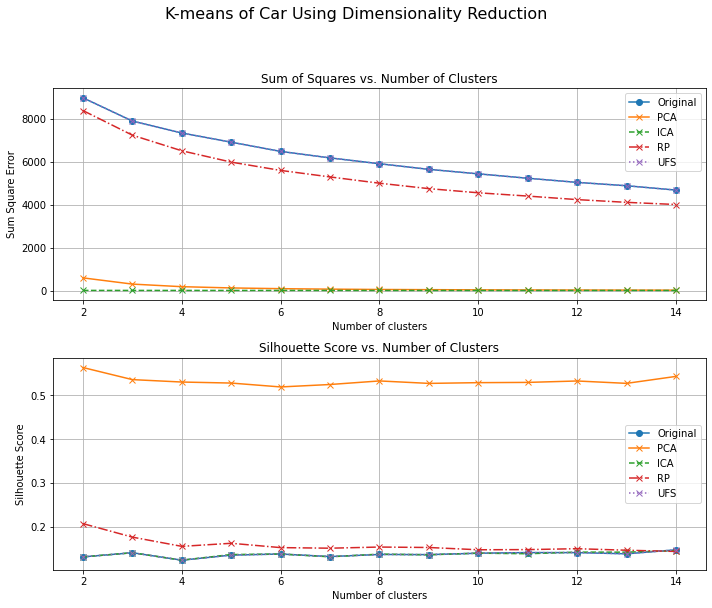

--------------------------------------------------------------------------------
*  K-Means Car Benchmark  *
--------------------------------------------------------------------------------
init		time	inertia	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Original 	0.45s	4691	0.255	0.081	0.123	0.021	0.117	0.146
PCA-based	0.07s	16	0.085	0.028	0.043	0.003	0.036	0.537


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ICA-based	0.42s	2	0.238	0.075	0.115	0.023	0.109	0.144


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RP-based 	1.93s	3996	0.182	0.058	0.088	0.012	0.082	0.146


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


UFS-based	0.55s	4685	0.262	0.083	0.126	0.023	0.120	0.144


In [ ]:
# Create plots
compare_kmeans('Car', car_data)

# Create benchmark table
print_line('K-Means Car Benchmark')
print('init\t\ttime\tinertia\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_kmeans(KMeans(init='k-means++', n_clusters=14), labels=carY, name="Original",  data=carX_scaled)
bench_kmeans(KMeans(init='k-means++', n_clusters=14), labels=carY, name="PCA-based", data=carPCA)
bench_kmeans(KMeans(init='k-means++', n_clusters=14), labels=carY, name="ICA-based", data=carICA)
bench_kmeans(KMeans(init='k-means++', n_clusters=14), labels=carY, name="RP-based",  data=carRP)
bench_kmeans(KMeans(init='k-means++', n_clusters=14), labels=carY, name="UFS-based", data=carUFS)

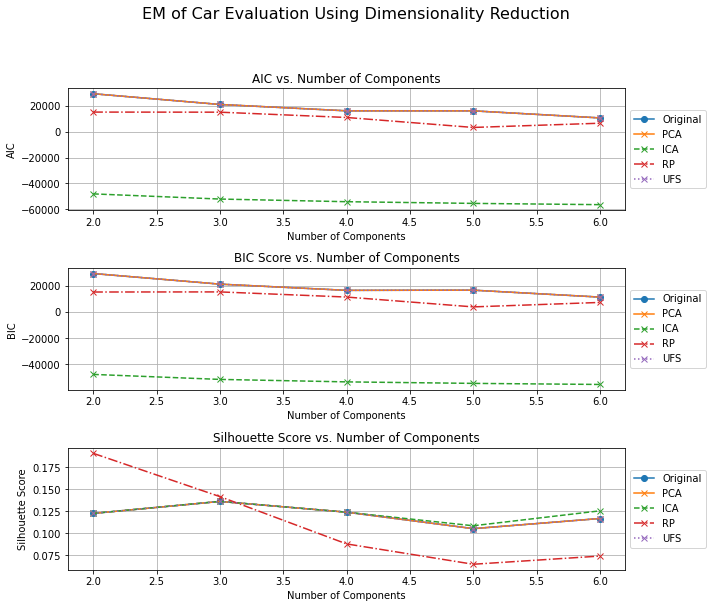

--------------------------------------------------------------------------------
*  EM Car Benchmark  *
--------------------------------------------------------------------------------
init		time	aic	bic	homog	compl	v-meas	ARI	AMI	silhouette
_____________________________________________________________________________________
Original 	1.36s	-7782	-4733	0.422	0.130	0.199	0.026	0.191	0.042
PCA-based	0.40s	-14053	-11004	0.369	0.113	0.173	0.006	0.165	0.016
ICA-based	0.50s	-60868	-57819	0.418	0.132	0.201	0.017	0.192	0.006
RP-based 	0.40s	-11159	-8110	0.457	0.142	0.216	0.023	0.208	-0.083
UFS-based	0.45s	-7782	-4733	0.422	0.130	0.199	0.026	0.191	0.042


In [ ]:
# Create k-means plots
compare_em('Car Evaluation', car_data)

# Create k-means benchmark table
print_line('EM Car Benchmark')
print('init\t\ttime\taic\tbic\thomog\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print(85*'_')
bench_em(GaussianMixture(n_components=20, random_state=0), labels=carY, name="Original",  data=carX_scaled)
bench_em(GaussianMixture(n_components=20, random_state=0), labels=carY, name="PCA-based", data=carPCA)
bench_em(GaussianMixture(n_components=20, random_state=0), labels=carY, name="ICA-based", data=carICA)
bench_em(GaussianMixture(n_components=20, random_state=0), labels=carY, name="RP-based",  data=carRP)
bench_em(GaussianMixture(n_components=20, random_state=0), labels=carY, name="UFS-based", data=carUFS)

In [ ]:
# Function based on:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/
def plot_learning_curve(clf, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
                                                        clf, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 20),
                                                        return_times = True,
                                                        random_state = 0)

    # ------------------------------------------------------------------------------------------
    # Plot Learning Curve
    # ------------------------------------------------------------------------------------------
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.figure(1)
    plt.plot(train_sizes, train_mean, '--', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Create learning curve plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # ------------------------------------------------------------------------------------------
    # Plot Scalability Curve
    # ------------------------------------------------------------------------------------------
    # Create mean and std of training times
    train_times_mean = np.mean(fit_times, axis=1)
    train_times_std  = np.std(fit_times, axis=1)
    
    # plot lines
    plt.figure(2)
    plt.plot(train_sizes, train_times_mean, 'o-')
    plt.fill_between(train_sizes, train_times_mean - train_times_std, train_times_mean + train_times_std, color='#DDDDDD')
    plt.title('Training Scalability')
    plt.xlabel('Training Set Size')
    plt.ylabel('Fit Times (s)')
    plt.grid()
    plt.show()
    
# Function based on:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion(clf, X_test, y_test, labels):
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay(clf, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        #print(title)
        #print(disp.confusion_matrix)
        plt.show()

    plt.show()
    
    return 0

In [ ]:
# split into train and test sets

# reduce wine data set
winePCA = PCA(n_components=9, random_state=0).fit_transform(wineX_scaled)
wineICA = FastICA(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineRP  = RP(n_components=8, random_state=0).fit_transform(wineX_scaled)
wineUFS = SelectKBest(f_classif, k=4).fit_transform(wineX_scaled, wineY)

wine_data = []
wine_data.append(['Original', wineX_scaled])
wine_data.append(['PCA', winePCA])
wine_data.append(['ICA', wineICA])
wine_data.append(['RP',  wineRP])
wine_data.append(['UFS', wineUFS])

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


--------------------------------------------------------------------------------
*  Original  *
--------------------------------------------------------------------------------
Neural Net model fit in 135.531 s
Best Score: 0.983 using {'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}


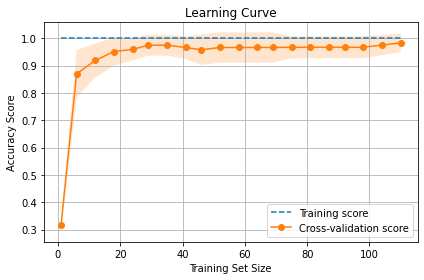

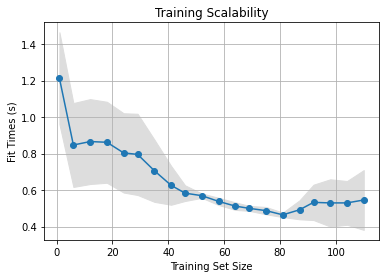

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      0.86      0.92        14

    accuracy                           0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.96      0.96      0.96        54

--------------------------------------------------------------------------------
*  PCA  *
--------------------------------------------------------------------------------
Neural Net model fit in 143.814 s
Best Score: 0.975 using {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


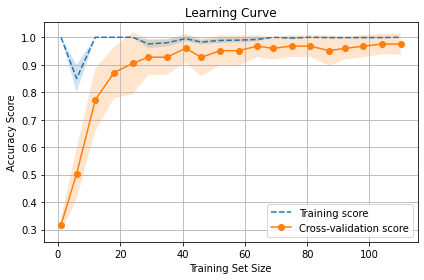

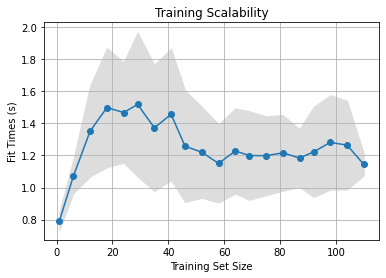

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

--------------------------------------------------------------------------------
*  ICA  *
--------------------------------------------------------------------------------
Neural Net model fit in 137.486 s
Best Score: 0.976 using {'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}


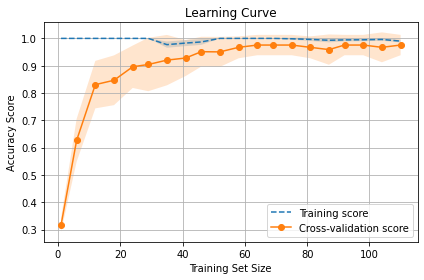

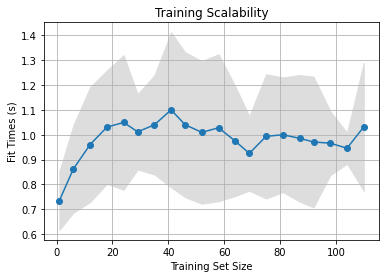

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

--------------------------------------------------------------------------------
*  RP  *
--------------------------------------------------------------------------------
Neural Net model fit in 155.011 s
Best Score: 0.975 using {'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'lbfgs'}


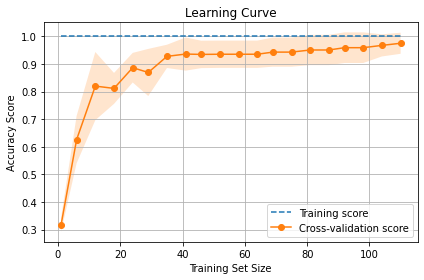

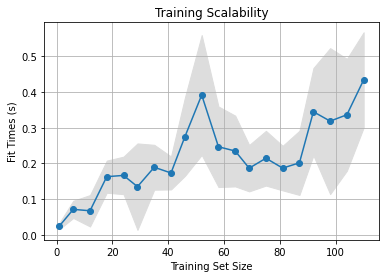

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

--------------------------------------------------------------------------------
*  UFS  *
--------------------------------------------------------------------------------
Neural Net model fit in 137.757 s
Best Score: 0.951 using {'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


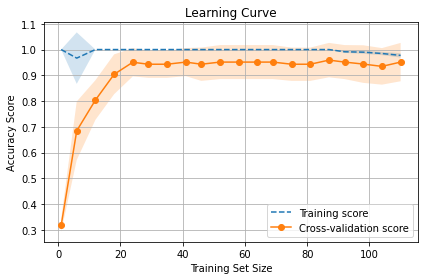

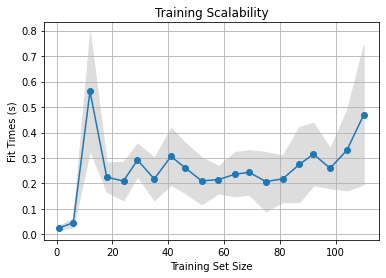

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.95      0.95      0.95        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Results
Data:  Original
	Time:    135.5306134223938
	Score:   0.9833333333333332
	Params:  {'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
Data:  PCA
	Time:    143.8138780593872
	Score:   0.9749999999999999
	Params:  {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
Data:  ICA
	Time:    137.4861843585968
	Score:   0.9756410256410255
	Params:  {'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'sgd'}
Data:  RP
	Time:    155.01090931892395
	Score:   0.9749999999999999
	Params:  {'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'so

In [ ]:
# Define Grid Search parameters
learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# define size of test set
test_size=0.3

# collect all results
nn_data = []

for d in wine_data:
    dataName = d[0]
    print_line(dataName)
    
    X = d[1]
    y = wineY
    
    # Scale the data
    X = scale(X)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                       parameters,
                       cv=10,
                       scoring='accuracy',
                       n_jobs=-1)
                
    t0 = time()
    clf.fit(X_train, y_train)
    nn_time = time() - t0
    
    print("Neural Net model fit in %.3f s" % nn_time)
    print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))
    
    # Create NN with best parameters from grid search
    nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                       solver=clf.best_params_["solver"],
                       hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                       max_iter=2000,
                       alpha=1,
                       random_state=0)
    
    # plot the learning curve for the data
    plot_learning_curve(nn, X_train, y_train)

    # Predict results using the test set
    nn.fit(X_train, y_train)
    nn_pred = nn.predict(X_test)
    
    # Calculate Null Accuracy
    calculate_null_accuracy(y)
    
    # let's see how our model performed
    print(classification_report(y_test, nn_pred))
    
    # ConfusionMatrixDisplay(nn, X_test, y_test, labels)
    
    
    # Collect results
    results = {
        "classifier": nn,
        "dataset": dataName,
        "time":    nn_time,
        "score":   clf.best_score_,
        "params":  clf.best_params_
    }
    
    nn_data.append(results)

print('Results')
for res in nn_data:
    print('Data: ',     res["dataset"])
    print('\tTime:   ', res["time"])
    print('\tScore:  ', res["score"])
    print('\tParams: ', res["params"])

In [ ]:
# create dataset

# cluster data and predict labels
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=0)
kmeans.fit(wineX_scaled)
kmeans_labels = kmeans.predict(wineX_scaled)

label_diff = (kmeans_labels - wineY)
label_diff = label_diff[label_diff != 0]
print('Correct Labels: %d/%d, %.2f percent' %(len(wineY)-len(label_diff), len(wineY), (len(wineY)-len(label_diff))/len(wineY)*100))

# add in cluster labels as additional feature
kmeans_wineX = np.c_[wineX_scaled, kmeans_labels]

X = kmeans_wineX
y = wineY

Correct Labels: 58/177, 32.77 percent


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Neural Net model fit in 132.303 s
Best Score: 0.975 using {'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'lbfgs'}


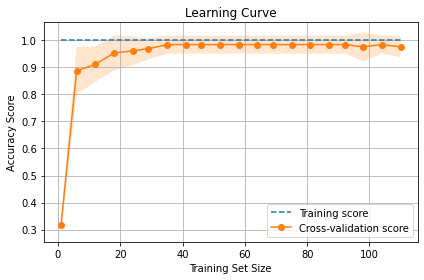

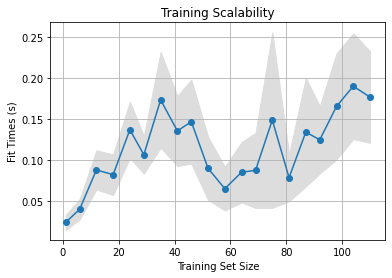

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=2000,
                   alpha=1,
                   random_state=0)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

# plot_confusion(nn, X_test, y_test, labels)

In [ ]:
# create dataset

# cluster data and predict labels
em = GaussianMixture(n_components=2, random_state=0)
em.fit(wineX_scaled)
em_labels = em.predict(wineX_scaled)

label_diff = (em_labels - wineY)
label_diff = label_diff[label_diff != 0]
print('Correct Labels: %d/%d, %.2f percent' %(len(wineY)-len(label_diff), len(wineY), (len(wineY)-len(label_diff))/len(wineY)*100))


# add in cluster labels as additional feature
em_wineX = np.c_[wineX_scaled, em_labels]

X = em_wineX
y = wineY

Correct Labels: 58/177, 32.77 percent


Neural Net model fit in 130.335 s
Best Score: 0.975 using {'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'lbfgs'}


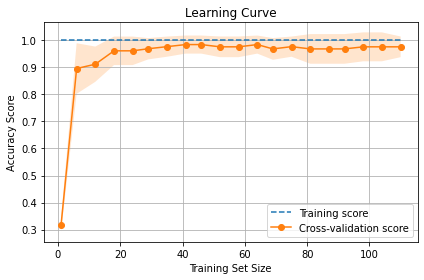

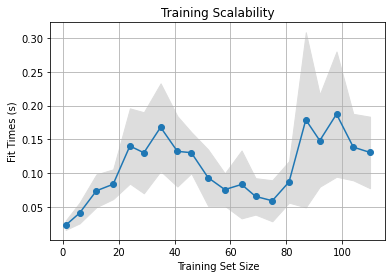

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
# Train Neural net

learning_rates = ['constant', 'invscaling']
solvers = ['sgd', 'lbfgs', 'adam']
layers = [(10,), (20,), (40,), (10,10), (20, 10), (20,20), (40,10), (40,20)]
parameters = {'solver': solvers, 'learning_rate': learning_rates, 'hidden_layer_sizes': layers}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = GridSearchCV(MLPClassifier(max_iter=2000, alpha=1, random_state=0),
                   parameters,
                   cv=10,
                   scoring='accuracy',
                   n_jobs=-1)
            
t0 = time()
clf.fit(X_train, y_train)
nn_time = time() - t0

print("Neural Net model fit in %.3f s" % nn_time)
print('Best Score: %.3f using %r' % (clf.best_score_, clf.best_params_))

# Create NN with best parameters from grid search
nn = MLPClassifier(learning_rate=clf.best_params_["learning_rate"],
                   solver=clf.best_params_["solver"],
                   hidden_layer_sizes=clf.best_params_["hidden_layer_sizes"],
                   max_iter=2000,
                   alpha=1,
                   random_state=0)

# plot the learning curve for the data
plot_learning_curve(nn, X_train, y_train)

# Predict results using the test set
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Calculate Null Accuracy
calculate_null_accuracy(y)

# let's see how our model performed
print(classification_report(y_test, nn_pred))

# plot_confusion(nn, X_test, y_test, labels)